Import Libraries

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd

Function to create a NxM feature vector of given RGB image where N = number of pixels , M = 3 color channel

In [2]:
def createDataset(I):
    '''
    Given a RGB Image of size (MxNx3)
    this function returns a 2D matrix
    of size MNx3
    '''
    return np.reshape(I,(I.shape[0]*I.shape[1],3))

Function to perform k-mean clustering

In [3]:
def kMeansCluster(features, centers, max_iters): 
    '''
    Performs k-means clustering given the intial
    k cluster centers on the dataset features
    Clustering done for max_Iter time
    If cluster center has no points, then update
    by assigning it to data center
    '''
    idx = np.ones((features.shape[0],1))*-1
    n_iters = 0
    n_idx = np.copy(idx)
    while(n_iters < max_iters):
        n_iters = n_iters + 1
        
        # Assign closest cluster centers
        dist = np.linalg.norm(features[:,None,:]-centers[None,:,:],axis=-1)
        n_idx = np.argmin(dist,axis = 1)
        
        # Break if no change in cluster centers
        if (np.array_equal(n_idx,idx)):
            break
        idx = np.copy(n_idx)
        # Recompute cluster centers based on new assignments
        for i in range(centers.shape[0]):
            if(np.any(idx == i)):
                centers[i] = np.mean(features[idx == i],axis =0)
            else:
                centers[i] = np.ones((1,3))*np.inf
    return idx,centers

Generates label mask corresponding to idx passed

In [4]:
def mapValues(I, idx, centers):
    '''
    Given a list of cluster centers
    create a mask for given image
    '''
    segmented_I = np.zeros((I.shape[0],I.shape[1],3))
    mask_labels = idx.reshape(I.shape[0],I.shape[1])

    for i in range(centers.shape[0]):
        segmented_I[mask_labels==i,:] = centers[i]
    segmented_I = segmented_I.astype(np.uint8)
    return segmented_I

Read original image

(-0.5, 1279.5, 719.5, -0.5)

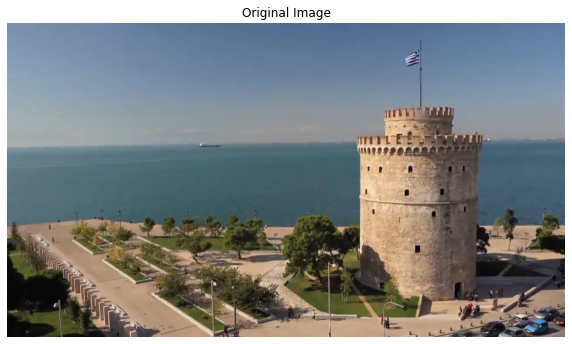

In [5]:
I = cv2.imread('white-tower.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.imshow(I)
plt.title('Original Image')
plt.axis('off')

In [6]:
nClusters = 7
#centers = features[np.random.choice(features.shape[0],7)]
centers = np.random.randint(0,255,(nClusters,3))
features = createDataset(I)
max_Iter = 100
idx,centers = kMeansCluster(features, centers, max_Iter)

Following are the cluster centers (0-255 range pixel value)

In [7]:
print(centers)

[[ 32  29  21]
 [ 85  76  56]
 [ 72  98 109]
 [100 125 153]
 [137 152 165]
 [155 130 107]
 [202 170 141]]


Although we started with 7 cluster, one of them is unassigned (cluster id - 6)

(-0.5, 1279.5, 719.5, -0.5)

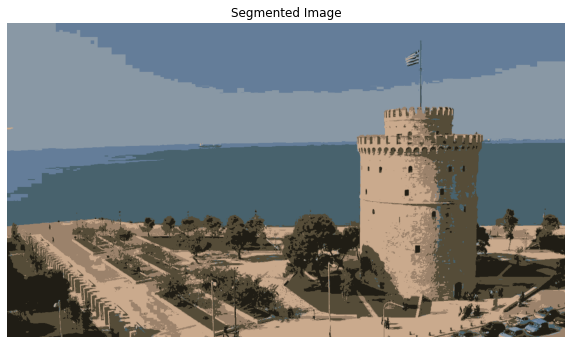

In [8]:
segmented_I = mapValues(I, idx, centers)

plt.figure(figsize=(10,10))
plt.imshow(segmented_I)
plt.title('Segmented Image')
plt.axis('off')